In [22]:
import tweepy
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
# Your Twitter API Keys
api_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))
file_name = os.path.join(api_dir, "api_keys.json")
data = json.load(open(file_name))

gkey = data['google_maps_API']
consumer_key = data['twitter_API']
consumer_secret = data['twitter_secret_API']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_secret_access']


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
file_name = os.path.join("nba_twitter_2017.csv")
nba_tweeters = pd.read_csv(file_name, dtype=str)

In [4]:
nba_tweeters.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,FGA_PG_RANK,FG_PCT_RANK,CFID,CFPARAMS,WIKIPEDIA_HANDLE,TWITTER_HANDLE,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
0,201566,Russell Westbrook,1610612760,OKC,28,81,46,35,0.568,34.6,...,1,293,5,"2,015,661,610,612,760",Russell_Westbrook,russwest44,26.54,31.6,1,4.5
1,1626246,Boban Marjanovic,1610612765,DET,28,35,16,19,0.457,8.4,...,356,47,5,"16,262,461,610,612,700",Boban_Marjanovi_,0,7,5.5,0,0
2,1627743,Demetrius Jackson,1610612738,BOS,22,5,1,4,0.2,3.4,...,480,3,5,"16,277,431,610,612,700",Demetrius_Jackson,d_jay11,1.45,2,1,0.049
3,203076,Anthony Davis,1610612740,NOP,24,75,31,44,0.413,36.1,...,3,95,5,"2,030,761,610,612,740",Anthony_Davis_(basketball),antdavis23,22.12,28,1,1.22
4,201935,James Harden,1610612745,HOU,27,81,54,27,0.667,36.4,...,9,253,5,"2,019,351,610,612,740",James_Harden,jharden13,26.5,29.1,1,4.47


In [7]:
nba_tweeters.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP',
       'W', 'L', 'W_PCT', 'MIN', 'OFF_RATING', 'DEF_RATING', 'NET_RATING',
       'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT',
       'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'USG_PCT', 'PACE', 'PIE', 'FGM',
       'FGA', 'FGM_PG', 'FGA_PG', 'FG_PCT', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'OFF_RATING_RANK', 'DEF_RATING_RANK',
       'NET_RATING_RANK', 'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK',
       'OREB_PCT_RANK', 'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK',
       'EFG_PCT_RANK', 'TS_PCT_RANK', 'USG_PCT_RANK', 'PACE_RANK', 'PIE_RANK',
       'FGM_RANK', 'FGA_RANK', 'FGM_PG_RANK', 'FGA_PG_RANK', 'FG_PCT_RANK',
       'CFID', 'CFPARAMS', 'WIKIPEDIA_HANDLE', 'TWITTER_HANDLE',
       'SALARY_MILLIONS', 'PTS', 'ACTIVE_TWITTER_LAST_YEAR',
       'TWITTER_FOLLOWER_COUNT_MILLIONS'],
      dtype='object')

In [8]:
for index, row in nba_tweeters.iterrows():
    
    try:
        target_user = row["TWITTER_HANDLE"]

        user_account = api.get_user(target_user)
        user_real_name = user_account["name"]
        print(user_real_name)


        tweets = user_account["statuses_count"]
        followers = user_account['followers_count']
        favorites = user_account['favourites_count']
        friends = user_account['friends_count']
        

        nba_tweeters.set_value(index, "Real Name", user_real_name)
        nba_tweeters.set_value(index, "Tweets", tweets)
        nba_tweeters.set_value(index, "Followers", followers)
        nba_tweeters.set_value(index, "Favorites Count", favorites)
        nba_tweeters.set_value(index, "Following", friends)
    
    except tweepy.TweepError:
        print ("target user skipped: " + target_user)
        continue
        
nba_tweeters.to_csv("project_nba_twitter.csv", index = False)

Russell Westbrook
j0
Demetrius Jackson
Anthony Davis
James Harden
Kevin Durant
LeBron James
Chris Paul
DeMarcus Cousins
Giannis Antetokounmpo
Kawhi Leonard
Joel Embiid
Karl-Anthony Towns
Nikola Jokic
Jimmy Butler
Hassan Whiteside
Rudy Gobert
Isaiah Thomas
Mike Conley
Damian Lillard
Gordon Hayward
DeMar DeRozan
Joel Bolomboy
Enes Kanter
John Wall
Blake Griffin
Zach Randolph
Dwight Howard
Stephen Curry
Marc Gasol
DeAndre Jordan
Kevin Love
Kyle Lowry
Pau Gasol
Nikola Vucevic
Eric Bledsoe
Greg Monroe
EDY tavares
Josh Huestis
Kemba walker
Andre Drummond
Jonas Valanciunas
Paul George
Kyrie Irving
José Juan Barea
Lou Williams
j0
Willy Hernangómez
Kyle O'Quinn
Jeremy Lin
Jeff Teague
Tyson Chandler
Clint Capela
Goran Dragić
Beno Udrih
Shawn Long
INDIANA GEORGE HILL
BigSauce
Trevor Booker
Me
Nerlens Noel
Paul Millsap
Staci
Al Horford
target user skipped: javalemcgee34
CJ McCollum
j0
Dirk Nowitzki
j0
J Lamb
Kenneth Faried
Dewayne Dedmon
David West
Brandon Bass
Lamarcus Aldridge
Jabari Parker
DWad

In [16]:
nba_tweeters.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,TWITTER_HANDLE,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS,Real Name,Tweets,Followers,Favorites Count,Following
0,201566,Russell Westbrook,1610612760,OKC,28,81,46,35,0.568,34.6,...,russwest44,26.54,31.6,1,4.5,Russell Westbrook,5655.0,5470010.0,28.0,715.0
1,1626246,Boban Marjanovic,1610612765,DET,28,35,16,19,0.457,8.4,...,0,7,5.5,0,0,j0,2310.0,137980.0,30.0,425.0
2,1627743,Demetrius Jackson,1610612738,BOS,22,5,1,4,0.2,3.4,...,d_jay11,1.45,2,1,0.049,Demetrius Jackson,436.0,55733.0,8847.0,431.0
3,203076,Anthony Davis,1610612740,NOP,24,75,31,44,0.413,36.1,...,antdavis23,22.12,28,1,1.22,Anthony Davis,4887.0,1408621.0,112.0,352.0
4,201935,James Harden,1610612745,HOU,27,81,54,27,0.667,36.4,...,jharden13,26.5,29.1,1,4.47,James Harden,12844.0,5530067.0,69.0,244.0


In [17]:
nba_tweeters.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP',
       'W', 'L', 'W_PCT', 'MIN', 'OFF_RATING', 'DEF_RATING', 'NET_RATING',
       'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT',
       'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'USG_PCT', 'PACE', 'PIE', 'FGM',
       'FGA', 'FGM_PG', 'FGA_PG', 'FG_PCT', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'OFF_RATING_RANK', 'DEF_RATING_RANK',
       'NET_RATING_RANK', 'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK',
       'OREB_PCT_RANK', 'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK',
       'EFG_PCT_RANK', 'TS_PCT_RANK', 'USG_PCT_RANK', 'PACE_RANK', 'PIE_RANK',
       'FGM_RANK', 'FGA_RANK', 'FGM_PG_RANK', 'FGA_PG_RANK', 'FG_PCT_RANK',
       'CFID', 'CFPARAMS', 'WIKIPEDIA_HANDLE', 'TWITTER_HANDLE',
       'SALARY_MILLIONS', 'PTS', 'ACTIVE_TWITTER_LAST_YEAR',
       'TWITTER_FOLLOWER_COUNT_MILLIONS', 'Real Name', 'Tweets', 'Followers',
       'Favorites Count', 'Following']

In [18]:
nba_tweeters_renamed = nba_tweeters.rename(columns={'PLAYER_NAME':'Player', 'MIN':'2017 Min/Gm', 'TWITTER_HANDLE':'Twitter Handle',
                                                   'SALARY_MILLIONS':'2017 Salary (MM)'})
nba_tweeters_renamed.head()

,PLAYER_ID,Player,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,2017 Min/Gm,...,Twitter Handle,2017 Salary (MM),PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS,Real Name,Tweets,Followers,Favorites Count,Following
0,201566,Russell Westbrook,1610612760,OKC,28,81,46,35,0.568,34.6,...,russwest44,26.54,31.6,1,4.5,Russell Westbrook,5655.0,5470010.0,28.0,715.0
1,1626246,Boban Marjanovic,1610612765,DET,28,35,16,19,0.457,8.4,...,0,7,5.5,0,0,j0,2310.0,137980.0,30.0,425.0
2,1627743,Demetrius Jackson,1610612738,BOS,22,5,1,4,0.2,3.4,...,d_jay11,1.45,2,1,0.049,Demetrius Jackson,436.0,55733.0,8847.0,431.0
3,203076,Anthony Davis,1610612740,NOP,24,75,31,44,0.413,36.1,...,antdavis23,22.12,28,1,1.22,Anthony Davis,4887.0,1408621.0,112.0,352.0
4,201935,James Harden,1610612745,HOU,27,81,54,27,0.667,36.4,...,jharden13,26.5,29.1,1,4.47,James Harden,12844.0,5530067.0,69.0,244.0


In [19]:
nba_twitter = nba_tweeters_renamed[['Player', 'Twitter Handle', '2017 Min/Gm', '2017 Salary (MM)', 'Tweets', 'Followers',
                                   'Favorites Count', 'Following']]
nba_twitter.head()

,Player,Twitter Handle,2017 Min/Gm,2017 Salary (MM),Tweets,Followers,Favorites Count,Following
0,Russell Westbrook,russwest44,34.6,26.54,5655.0,5470010.0,28.0,715.0
1,Boban Marjanovic,0,8.4,7,2310.0,137980.0,30.0,425.0
2,Demetrius Jackson,d_jay11,3.4,1.45,436.0,55733.0,8847.0,431.0
3,Anthony Davis,antdavis23,36.1,22.12,4887.0,1408621.0,112.0,352.0
4,James Harden,jharden13,36.4,26.5,12844.0,5530067.0,69.0,244.0


In [20]:
nba_twitter = nba_twitter[(nba_twitter['Twitter Handle'] != '0')]
nba_twitter.head()

,Player,Twitter Handle,2017 Min/Gm,2017 Salary (MM),Tweets,Followers,Favorites Count,Following
0,Russell Westbrook,russwest44,34.6,26.54,5655.0,5470010.0,28.0,715.0
2,Demetrius Jackson,d_jay11,3.4,1.45,436.0,55733.0,8847.0,431.0
3,Anthony Davis,antdavis23,36.1,22.12,4887.0,1408621.0,112.0,352.0
4,James Harden,jharden13,36.4,26.5,12844.0,5530067.0,69.0,244.0
5,Kevin Durant,KDTrey5,33.4,26.54,23176.0,17427756.0,93.0,1454.0


In [39]:
twitter_sort = nba_twitter.sort_values('2017 Min/Gm', ascending=True)
twitter_sort.head()

,Player,Twitter Handle,2017 Min/Gm,2017 Salary (MM),Tweets,Followers,Favorites Count,Following
73,Brandon Bass,bestbetbass,11.1,1.55,923.0,24949.0,8.0,39.0
98,Cheick Diallo,cheick_diallo13,11.7,1.31,1548.0,15588.0,967.0,167.0
95,Thomas Robinson,trobinson0,11.7,1.05,13154.0,124966.0,459.0,774.0
72,David West,d_west30,12.6,1.55,5288.0,248917.0,759.0,588.0
55,Shawn Long,shawnlong21,13,0.54,6966.0,2220.0,2130.0,561.0


In [56]:
pd.to_numeric(twitter_sort['2017 Min/Gm'], errors='ignore')

73    11.1
98    11.7
95    11.7
72    12.6
55    13.0
37    13.8
59    14.3
54    14.4
57    15.1
38    15.4
48    15.6
93    15.7
91    16.0
90    16.7
71    17.5
69    18.4
47    18.4
62    18.7
84    19.7
60    20.5
89    20.9
70    21.2
23    21.3
87    21.4
44    22.0
36    22.5
52    23.9
49    24.5
26    24.5
45    24.6
      ... 
94    33.9
16    33.9
75    33.9
83    34.0
61    34.0
25    34.0
8     34.2
29    34.2
82    34.3
20    34.5
0     34.6
39    34.7
81    34.9
65    34.9
43    35.1
21    35.4
99    35.5
9     35.6
19    35.9
42    35.9
3     36.1
24    36.4
4     36.4
14    37.0
12    37.0
32    37.4
6     37.8
22     4.4
80     6.4
64     9.6
Name: 2017 Min/Gm, Length: 95, dtype: float64

In [80]:
twitter_sort = twitter_sort[(twitter_sort['2017 Min/Gm'] != '4.4')]
twitter_sort = twitter_sort[(twitter_sort['2017 Min/Gm'] != '6.4')]
twitter_sort = twitter_sort[(twitter_sort['2017 Min/Gm'] != '9.6')]
pd.to_numeric(twitter_sort['2017 Min/Gm'])
twitter_sort

,Player,Twitter Handle,2017 Min/Gm,2017 Salary (MM),Tweets,Followers,Favorites Count,Following
73,Brandon Bass,bestbetbass,11.1,1.55,923.0,24949.0,8.0,39.0
98,Cheick Diallo,cheick_diallo13,11.7,1.31,1548.0,15588.0,967.0,167.0
95,Thomas Robinson,trobinson0,11.7,1.05,13154.0,124966.0,459.0,774.0
72,David West,d_west30,12.6,1.55,5288.0,248917.0,759.0,588.0
55,Shawn Long,shawnlong21,13,0.54,6966.0,2220.0,2130.0,561.0
37,Edy Tavares,waltertavares22,13.8,1,1542.0,13844.0,2405.0,348.0
59,Archie Goodwin,a1laflare10,14.3,0.94,2900.0,96059.0,576.0,336.0
54,Beno Udrih,benoudrih1,14.4,1.55,2582.0,24615.0,10874.0,552.0
57,Alan Williams,alantwilliams,15.1,0.96,13117.0,10162.0,3348.0,390.0
38,Josh Huestis,jhuestis,15.4,1.14,3472.0,20219.0,810.0,426.0


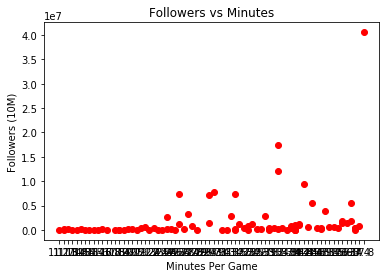

In [104]:
followers = twitter_sort['Followers']
minutes = twitter_sort['2017 Min/Gm']
tweets = twitter_sort['Tweets']
plt.scatter(minutes, followers, color='red')
plt.title('Followers vs Minutes')
plt.ylabel('Followers (10M)')
plt.xlabel('Minutes Per Game')
plt.savefig('MPG_v_Foll.png')
plt.show()

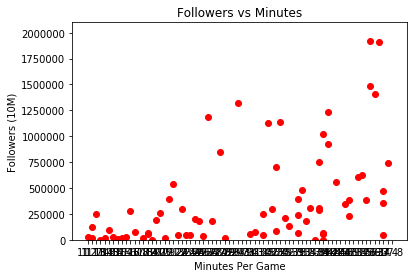

In [105]:
#Removed LeBron
plt.scatter(minutes, followers, color='red')
plt.title('Followers vs Minutes')
plt.ylabel('Followers (10M)')
plt.ylim(0,2100000)
plt.xlabel('Minutes Per Game')
plt.savefig('MPG_v_Foll_no_King.png')
plt.show()

In [98]:
twitter_sort_sal = nba_twitter.sort_values('2017 Salary (MM)', ascending=True)
twitter_sort_sal.head()

,Player,Twitter Handle,2017 Min/Gm,2017 Salary (MM),Tweets,Followers,Favorites Count,Following
90,Michael Beasley,easyst0,16.7,0.31,NaN,NaN,NaN,NaN
55,Shawn Long,shawnlong21,13,0.54,6966.0,2220.0,2130.0,561.0
22,Joel Bolomboy,bolomboy21,4.4,0.6,2458.0,9610.0,1533.0,187.0
59,Archie Goodwin,a1laflare10,14.3,0.94,2900.0,96059.0,576.0,336.0
57,Alan Williams,alantwilliams,15.1,0.96,13117.0,10162.0,3348.0,390.0


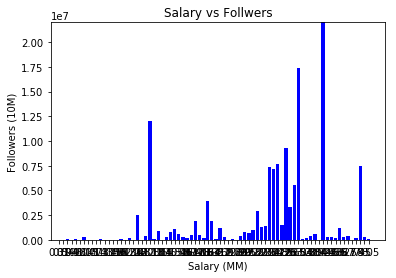

In [106]:
salary = twitter_sort['2017 Salary (MM)']
plt.bar(salary, followers, color='b')
plt.title('Salary vs Follwers')
plt.ylabel('Followers (10M)')
plt.ylim(0,22000000)
plt.xlabel('Salary (MM)')
plt.savefig('Sal_v_Foll_no_King.png')
plt.show()

In [ ]:
plt.histogram